# Crime in Sweden, distribution and trends. 

### Date: 2021-06-02

### Author: Mercy Lard 


## 

### Technical notes/References

#### Crime data source: https://www.bra.se/bra-in-english/home/crime-and-statistics/crime-statistics.html#Reportedoffences
#### -> Survey of a selection of crimes distributed over a 70 year period.

#### Population data source: https://www.scb.se/en/

#### Data for Population by region, marital status, age and sex for years 1968-2020: http://www.statistikdatabasen.scb.se/pxweb/en/ssd/START__BE__BE0101__BE0101A/BefolkningNy/

-> Population data is taken from Statistical Crime Agency, or Statistiska Centralbyrån (SCB). Download: Variables selected as xlsx file. Observations: Population; Region: Sweden; Marital Status: Not selected; Age: Not selected; Sex: Not Selected; Year: Not selected

-> Population Information: The tables show the conditions on December 31st for each respective year according to administrative subdivisions of January 1st of the following year.

-> Official statistics: Yes, Latest update: 2021-02-22, Contact: Tomas Johansson, Statistics Sweden, +46 010-479 64 26, tomas.johansson@scb.se, (SCB) Statistikservice, Statistics Sweden, +46 010-479 50 00, information@scb.se

#### Popluation data source (older data): https://web.archive.org/web/20170216053029/http://www.scb.se/en/finding-statistics/statistics-by-subject-area/population/population-composition/population-statistics/pong/tables-and-graphs/yearly-statistics--the-whole-country/population-and-population-changes-17492015/

-> From this archive source, I retreive the population data from 1950-1967. Downloaded as an excel file.

#### Note:
We can control for changes in population by looking instead at the total number of crimes per 100K persons.

#### Understanding the data: 
Here you can find an English translation of the Swedish Criminal Code. https://www.government.se/press-releases/2020/01/an-up-to-date-english-translation-of-the-swedish-criminal-code/

The different data sets of crimes from Brå from different time periods and areas in Sweden:http://statistik.bra.se/solwebb/action/index

https://bra.se/statistik/kriminalstatistik/anmalda-brott.html

To see the full statistics on reported crimes for each section of the Swedish criminal code from 2008 - 2020: https://www.bra.se/bra-in-english/home/crime-and-statistics/crime-statistics.html#Reportedoffences Under Reported offences select -> download tables -> period -> year.




## 

### Project goals - The Business Case


Here I present my steps for retrieving a selection of the crime data in Sweden for the last 70 years and how I look at trends with the aim to perform some predictions on time series based data with machine learning methods. I also include the population data which may act as a predictive variable in the algorithm. 

I will perform this analysis as a way to look at the broader picture in terms of crime in Sweden. From this I can then look deeper into regions where crime is cocentrated and look for possible predictions of how it will develop in the coming years based on previous and current growth, so called 'forcasting'. 

-> NEXT LEVEL <- 

Then, I discuss the types of crimes which may be prevented or reduced with the help of surveillance or anti-theft services. 

This is relevant for crime prevention authorities, i.e. police and for security companies which would like to provide a tailored suite of anti-theft services to their clients. 

For example, if the crime for burglaries and breakins is quite low, but car theft is high, one could offer security cameras specifically for monitoring vehicles where applicable. Other security services may be developed from this knowledge.

## 

### Comparison - Brå 2020 Swedish Crime Survey

Interestingly, one can also look at the surveys produced by Brå, in order to see information about how persons self reported crimes compare with their perception of crime.

The following images are taken from the Swedish Crime Survey of 2020

#### Reference: https://www.bra.se/bra-in-english/home/publications/archive/publications/2020-10-15-swedish-crime-survey-2020.html?lang=sv

In the sample of 200,000 persons there were approximately 74,000 respondents. 

Example: Self reported victimisation of property at residential domicile.



![title](Self_reported_victimisation_SCS_Brå_2020.jpg)


The data above shows that in the areas of vehicle theft, theft from a vehicle and burglary self reported statistics are stable of the past four years, while bicicle theft has increased in the last two years, with a general upwards trend form 2012. Meanwhile, self reported car theft has decreased significantly since 2006. 

## 


![title](Brå_2020_Survey_Fig25_vehicle_theft.jpg)

While the self reporting of vehicle theft is around 1 % of the surveyed participants, those who actually own a car report higher concern (very often/quite often) over being a victim at about 27 %, which is comparable between genders.

This is interesting to consider and to discuss when doing statistical analysis, and explaining the results to customers/stakeholders/authorities. 


## 


### Data retreival and formatting

In order to fetch the files I downloaded the data from Brå, SCB and SCB web archived data. 

The way the table was structured made it a very slow process to try and import using pandas. In order to read the files with pandas into my jupyter nb, I first created a new csv and removed empty cells, spurious headers/titles and other unneccesary discriptions, such as notes listed above. I then renamed column headers to allow for easier and more descriptive naming, which would be compatible in SQL environments. There were very few columns (21 total), so it was simple to do by hand.

Possible to use Alteryx to parse the data from different files: https://help.alteryx.com/current/designer/multi-row-formula-tool

Or use pandas tricks to import from a messy excel file: https://towardsdatascience.com/read-messy-excel-files-like-a-pro-27880306ad0b

Or this if you have semi structured excel file: https://pbpython.com/pandas-excel-range.html

We must note that from the selection of crimes summarized by Brå, there are a few instances where the crimes are actually subcategories (sections, §) within the larger categories (Chapters).

### The column keys are as follows: all are given in terms of per 100K population statistics.

a.  year - the year ranges from 1950 - 2020

b.	total_crimes - total number of reported crimes

c.	total_penal_crimes - total crimes against the Penal Code

d.	total_life_and_health - Out of total crimes against Penal Code: Crimes against life and health (Ch 3).

e.	murder - Out of total crimes against life and health, those crimes consisting of Completed murder, manslaughter and assault resulting in death, (Ch. 3, § 1, 2, 5, 6).

f.	assault - Out of total crimes against life and health, those crimes consisting of assault, and aggravated assault. (Ch. 3, § 5,6 Assault not resulting in death)

g.	total_sexual_offence - Out of total crimes against Penal Code: Sexual offences (Ch. 6)

h.	rape - Out of total sexual offences, those crimes classified as rape (Ch. 6, § 1, 4)

i.	total_theft - Out of total crimes against Penal Code: Theft, robbery, and other offences of stealing (Ch. 8)*

j.	burglary_no_guns - Out of total crimes against Penal Code, classified as theft, robbery, and other offences of stealing, those burglaries, not involving fire arms. (Ch. 8, § 1, 2, 4 Burglary, not involving fire arms)**

k.	burglary_home - Out of total crimes against Penal Code, classified as theft, robbery, and other offences of stealing, those burglaries, not involving fire arms, which occurred in flats, and private houses. (Ch. 8, § 1, 2, 4 Burglary, not involving fire arms: In dwellings, summer houses, etc: In flats, private houses)** ***Subset of above***

l.	vehicle_theft - Out of total crimes against Penal Code, classified as theft, robbery, and other offences of stealing, those which include stolen vehicles. (Ch. 8, § 7 Vehicle theft: Car theft)

m.	theft_out_of_vehicle - Out of total crimes against Penal Code, classified as theft, robbery, and other offences of stealing, those which include theft out of a stolen vehicle. (Ch. 8, § 1, 2, 4 Other theft: From vehicle: Out of a motor vehicle)

n.	theft_shop - Out of total crimes against Penal Code, classified as theft, robbery, and other offences of stealing, those which include theft from shops, department stores etc. (Ch. 8, § 1, 2, 4 Other theft: From shops, department stores, etc.)

o.	theft_aggravated - Out of total crimes against Penal Code, classified as theft, robbery, and other offences of stealing, those which include robbery and aggravated robbery (i.e. with a weapon intended to harm). (Ch. 8, § 5,6)

p.	fraud - Out of total crimes against Penal Code: Fraud and other acts of dishonesty (Ch. 9)

q.	criminal_damage - Out of total crimes against Penal Code: Criminal damage (Ch. 12)

r.	total_other_penal_crimes - total OTHER crimes against Penal Code, Crimes against special penal legislation, not included in column c.

s.	narcotics - Of total OTHER crimes against Penal Code, Crimes against special penal legislation: Crimes against the Narcotics Drugs (Penal) Act.

t.	driving_under_influence -  Of total OTHER crimes against Penal Code, Crimes against special penal legislation: Crimes against the Road and Traffic Offences Act: Driving under influence of alcohol -incl. aggravated offences- (§ 4, 4a) AND Driving under the influence of illicit drugs -including aggravated offences- (§ 4 2 st)

u.	population - Population in Sweden total for 1950 - 2020


## 

 I will first start by importing relevant libraries, reading the data and looking at an overview of the dataframe. I will then go into exploratory data analysis and finally build my model. 

### Import relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [2]:
# For Notebooks # # For Notebooks connects JS to notebook
init_notebook_mode(connected=True)

In [3]:
# For offline use allows for ploting in cufflinks
cf.go_offline()

### Read in the data

#### Here we define the data frame as 'crime' when reading the csv file, while setting the index to year. This will make it easier to index the individual columns over time.

In [4]:
crime = pd.read_csv('Reported_crimes_analysis_per100K_1950_2020.csv', index_col='year')


### Overview of data

#### Here we can check to see that there are integers or floats with no null values in our columns.

In [5]:
#Check the data to see that there are no null items in the list and that the data is of the correct type. 
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 1950 to 2020
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   pop                       71 non-null     int64
 1   total_crimes              71 non-null     int64
 2   total_penal_crimes        71 non-null     int64
 3   total_life_and_health     71 non-null     int64
 4   murder                    71 non-null     int64
 5   assault                   71 non-null     int64
 6   total_sexual_offence      71 non-null     int64
 7   rape                      71 non-null     int64
 8   total_theft               71 non-null     int64
 9   burglary_no_guns          71 non-null     int64
 10  burglary_home             71 non-null     int64
 11  vehicle_theft             71 non-null     int64
 12  theft_out_of_vehicle      71 non-null     int64
 13  theft_shop                71 non-null     int64
 14  theft_aggravated          71 non-null  

In [6]:
#Check the first few years of data.
crime.head(20)

,pop,total_crimes,total_penal_crimes,total_life_and_health,murder,assault,total_sexual_offence,rape,total_theft,burglary_no_guns,burglary_home,vehicle_theft,theft_out_of_vehicle,theft_shop,theft_aggravated,fraud,criminal_damage,total_other_penal_crimes,narcotics,driving_under_influence
year,,,,,,,,,,,,,,,,,,,,
1950,70,2773,2297,120,1,105,40,5,1571,294,0,0,0,0,3,208,72,475,0,49
1951,71,3272,2743,124,1,109,45,6,1892,340,0,0,0,0,3,309,73,528,0,66
1952,72,3149,2598,119,1,103,39,4,1839,371,0,0,0,0,3,217,81,551,0,77
1953,72,2901,2681,118,1,105,44,5,1924,360,0,0,0,0,4,208,88,219,0,90
1954,72,3019,2783,125,1,107,41,5,1975,392,0,0,0,0,4,235,100,236,0,103
1955,73,3344,3090,135,1,118,44,5,2246,457,0,0,0,0,4,235,110,255,0,124
1956,73,3476,3204,132,1,116,38,5,2355,468,0,0,0,0,6,234,132,272,0,159
1957,74,3762,3508,132,1,116,36,5,2626,578,0,244,0,0,6,253,155,254,0,163
1958,74,4053,3781,127,1,113,40,6,2872,722,0,279,0,0,6,254,166,272,1,165


Looking at the data we can see that in the first 20 years recorded, we are missing data for certain crimes, namely, burglary from private residences, theft out of vehicles and shop theft. We also have very little data on narcotics up until 1965. 

One main reason for the missing data is that the Penal Code was not in force until 1965. Prior to this, there may have not been a difference in reporting and classification of these crimes, some of which were not yet included. 

The Penal Code for Narcotics was not enacted until 1968 for example, and thus the data is quite sparse before this. Prior to 1988, it was not illegal to consume drugs, and in 2002, Sweden inducted its first National Alcohol/Drug act Plan (ANDT) which alcohol, narcotics, drugs and tobacco.

In the current digital age, many new crimes have been included which previously did not exist.

In creating our model it might be best to drop these rows before proceeding so we can get the best performance.

In [7]:
crime = crime.iloc[15:] #data will from 1965 and forward.


In [8]:
crime.head()

,pop,total_crimes,total_penal_crimes,total_life_and_health,murder,assault,total_sexual_offence,rape,total_theft,burglary_no_guns,burglary_home,vehicle_theft,theft_out_of_vehicle,theft_shop,theft_aggravated,fraud,criminal_damage,total_other_penal_crimes,narcotics,driving_under_influence
year,,,,,,,,,,,,,,,,,,,,
1965,78,5772,5065,166,3,150,51,8,3676,1037,98,395,713,123,12,429,296,707,9,212
1966,78,6036,5239,183,2,166,47,8,3719,1027,104,348,638,167,14,527,286,797,13,217
1967,79,6401,5537,188,2,172,49,8,3927,1083,108,383,637,204,13,546,313,864,51,228
1968,79,7150,6228,228,1,212,47,8,4230,1229,114,395,626,291,15,799,363,922,100,201
1969,80,7637,6009,240,1,222,42,8,4124,1126,116,382,572,254,16,678,374,1628,549,230


In [9]:
#Get a quick look at simple statistics of the data set.
crime.describe()

,pop,total_crimes,total_penal_crimes,total_life_and_health,murder,assault,total_sexual_offence,rape,total_theft,burglary_no_guns,burglary_home,vehicle_theft,theft_out_of_vehicle,theft_shop,theft_aggravated,fraud,criminal_damage,total_other_penal_crimes,narcotics,driving_under_influence
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,87.839286,12216.821429,10433.392857,576.517857,2.107143,541.571429,96.392857,29.000000,6306.607143,1373.892857,207.214286,459.553571,1126.982143,532.017857,62.642857,992.910714,1170.910714,1776.750000,520.357143,251.285714
std,6.744093,2717.259563,2311.457436,275.508455,0.801784,260.596020,62.833598,24.628144,1417.636749,342.700223,48.401245,214.551958,460.961978,176.122013,29.792878,508.233063,552.889444,561.783855,310.318161,42.891709
min,78.000000,5772.000000,5065.000000,166.000000,1.000000,150.000000,29.000000,7.000000,3676.000000,729.000000,98.000000,97.000000,434.000000,123.000000,12.000000,429.000000,286.000000,707.000000,9.000000,137.000000
25%,83.000000,10117.000000,8601.000000,304.000000,2.000000,283.500000,45.250000,10.000000,5489.250000,1034.500000,184.000000,348.750000,700.750000,380.250000,40.500000,611.750000,738.250000,1400.500000,299.750000,229.500000
50%,87.000000,13344.500000,11757.000000,580.000000,2.000000,551.000000,82.500000,18.500000,6205.500000,1432.500000,209.000000,427.500000,1171.500000,586.500000,67.500000,837.500000,1109.500000,1651.000000,427.500000,255.500000
75%,91.250000,14197.500000,12103.250000,871.750000,2.000000,805.500000,134.000000,47.500000,7644.000000,1665.750000,242.750000,664.250000,1525.000000,686.000000,88.750000,1202.500000,1623.500000,2151.250000,814.750000,276.500000
max,104.000000,15261.000000,12736.000000,1001.000000,4.000000,943.000000,241.000000,90.000000,8618.000000,1874.000000,295.000000,879.000000,1866.000000,805.000000,104.000000,2544.000000,2251.000000,2952.000000,1195.000000,336.000000


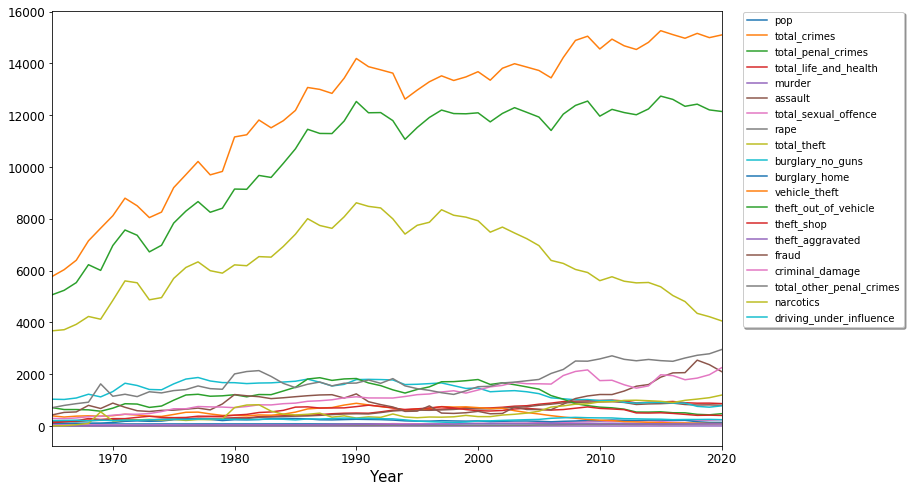

In [10]:
#Plot the crimes over the full time period.
ax = crime.plot(figsize=(12,8))
ax.tick_params(labelsize=12)
ax.set_xlabel('Year', fontsize=15)
ax.set(xlim=(1965,2020))
plt.legend(loc = 'upper right', shadow = True, bbox_to_anchor = (1.28, 1.01))


As we can see from the plot above, we have to separate out the different types of crimes to see better how they are evolving over time and their relationships. We cannot easily visualize so many variables!

#### We can do this by creating new data frames with only subcategories such as theft, or by selectively plotting these items together.


In [11]:
crime.iplot()

In [12]:
#Create a sub-df which looks at only theft under Ch. 8. 
theft = crime.loc[:,['burglary_home', 'vehicle_theft', 'theft_out_of_vehicle', 'theft_shop', 'theft_aggravated']]
theft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 1965 to 2020
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   burglary_home         56 non-null     int64
 1   vehicle_theft         56 non-null     int64
 2   theft_out_of_vehicle  56 non-null     int64
 3   theft_shop            56 non-null     int64
 4   theft_aggravated      56 non-null     int64
dtypes: int64(5)
memory usage: 2.6 KB


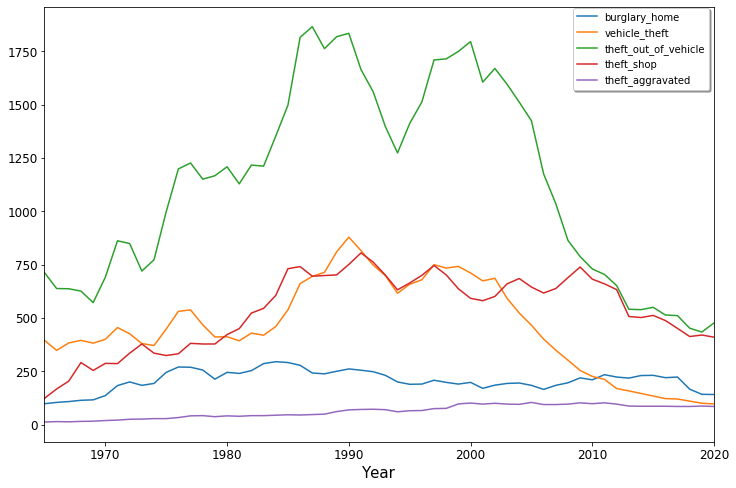

In [13]:
#Plot the theft over the full time period.
ax = theft.plot(figsize=(12,8))
#ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000] #alternative method for setting 'K' as place holder for larger numbers.
#ax.set_yticklabels(ylabels) #produce output for yticks in 'K'
ax.tick_params(labelsize=12)
ax.set_xlabel('Year', fontsize=15)
ax.set(xlim=(1965,2020))
plt.legend(loc = 'upper right', shadow = True, bbox_to_anchor = (1.0, 1.01))

#ax.yaxis.set_major_formatter(ticker.EngFormatter())
#Alternative to set y-axis with 'k', but does not look as nice. 

#### We can then create a pairplot using sns on the theft data frame in order to see any possible positively correlated variables.

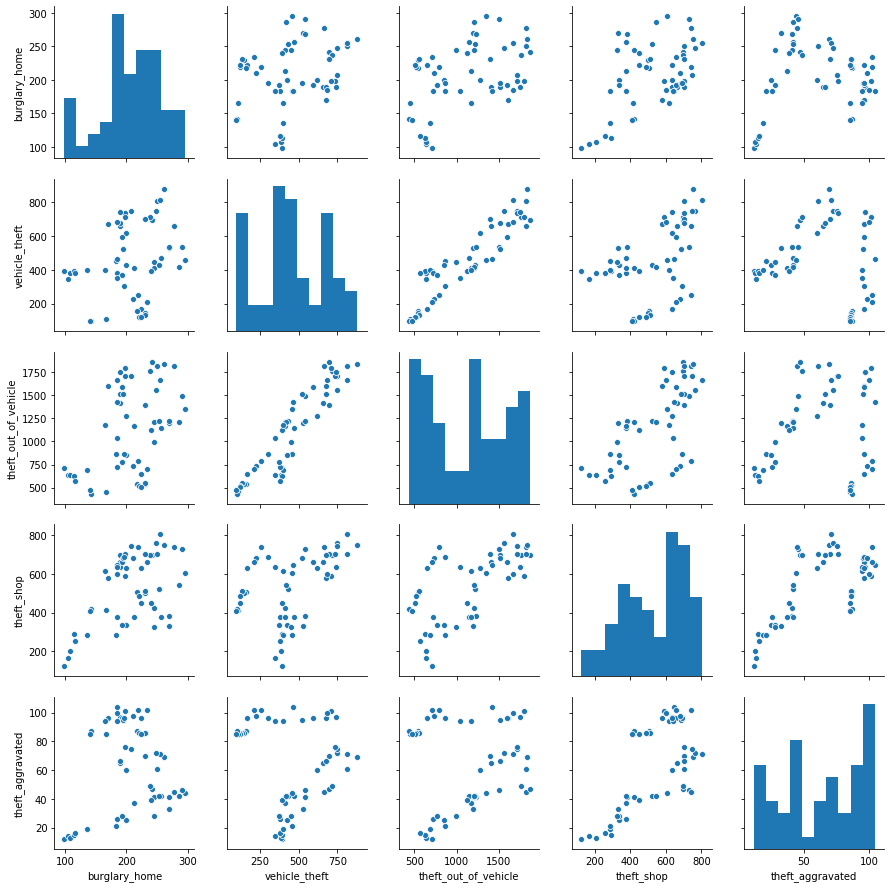

In [14]:
sns.pairplot(data=theft)

#Alternatively, one could call the variables from the original dataframe.
#sns.pairplot(data=crime, vars=['total_theft','burglary_no_guns', 'burglary_home', 'vehicle_theft', 'theft_out_of_vehicle', 'theft_shop', 'theft_aggravated'])

#Note axis formating according to previous selection will not work with sns pairgrid.


We can see that vehicle theft and theft out of a vehicle are most positively correlated. Which could suggest that, if a theif is already stealing a vehicle, they will likely also steal something from inside the vehicle, but not necessarily vice versa.

#### We can also perform a similar visualisation of correlation with seaborns heatmap.

(5, 0)

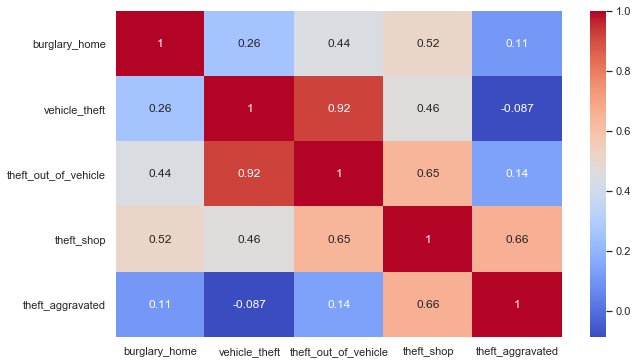

In [15]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1)
sns.heatmap(theft.corr(),annot=True,cmap='coolwarm', annot_kws={'size':12})
plt.ylim(5, 0)
#also looks good with mako

#### Create a simple scatterplot of vehicle theft and theft from a vehicle to look more closely at the correlation (0.89) from  the pairplot above.

Text(0.5, 0, 'Vehicle_Theft')

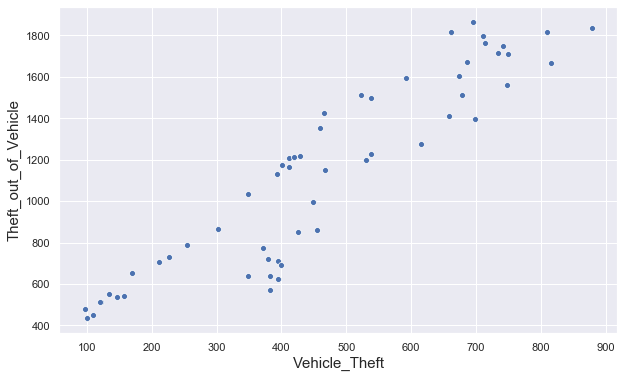

In [16]:
#Seaborn scatterplot
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='vehicle_theft', y='theft_out_of_vehicle', data=crime)
#ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000]
#ax.set_yticklabels(ylabels) 
ax.set_ylabel('Theft_out_of_Vehicle', fontsize=15)

#xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000] 
#ax.set_xticklabels(xlabels) 
ax.set_xlabel('Vehicle_Theft', fontsize=15)
#plt.ylabel("Theft_out_of_Vehicle")
#plt.xlabel("Vehicle_Theft") Unnecessary with above set_x or set_ylabel


#### We can then create a simple plot of the vehicle theft and theft out of a vehicle to observe changes over the entire time period.

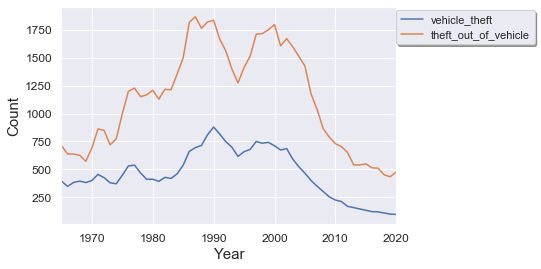

In [17]:

ax = sns.lineplot(x=crime.index, y='vehicle_theft', data=crime, label='vehicle_theft')
sns.lineplot(x=crime.index, y='theft_out_of_vehicle', data=crime, label='theft_out_of_vehicle')

#ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000] #alternative method for setting 'K' as place holder for larger numbers.
#ax.set_yticklabels(ylabels) #produce output for yticks in 'K'
ax.set_ylabel('Count', fontsize=15)

ax.set(xlim=(1965,2020))
ax.tick_params(labelsize=12)
ax.set_xlabel('Year', fontsize=15)

#plt.ylabel("Counts")
#plt.xlabel("Year")
plt.legend(loc = 'upper right', shadow = True, bbox_to_anchor = (1.43, 1.01))


It seems like these two objects are highly correlated from 1965, when the Penal Code was entered into force.

It might be good to think about this before performing modeling with this data as it could be duplicate information, we are not sure how the collection of these two types of crimes are done, i.e. are they actually happening at the same time and being recorded as two separate crimes. 

The same could be said for all other types as well, as we know for cases such as burglary and theft, e.g. if a person is reporting a burglary (unlawful entry to ones home) and also that they have stolen something (theft) these could be recorded as two separate cases.  We do not have this data included in the dataframe for now.

#### Another interesting comparison would be to look at some of the categories with the highest crimes.

In [18]:
crime.sum()

#This is where SQL analysis would be useful. One could quickly compare
#values in the differnt categories and for different years or periods. 

pop                           4919
total_crimes                684142
total_penal_crimes          584270
total_life_and_health        32285
murder                         118
assault                      30328
total_sexual_offence          5398
rape                          1624
total_theft                 353170
burglary_no_guns             76938
burglary_home                11604
vehicle_theft                25735
theft_out_of_vehicle         63111
theft_shop                   29793
theft_aggravated              3508
fraud                        55603
criminal_damage              65571
total_other_penal_crimes     99498
narcotics                    29140
driving_under_influence      14072
dtype: int64

In [19]:
#looking at the cumulative total of theft as a fraction of total crimes
sum_total_theft = crime['total_theft'].sum()/crime['total_crimes'].sum()
sum_total_theft

0.5162232402045189

In [20]:
sum_fraud = crime['fraud'].sum()/crime['total_crimes'].sum()
sum_fraud

0.08127406298692377

In [21]:
sum_criminal_damage = crime['criminal_damage'].sum()/crime['total_crimes'].sum()
sum_criminal_damage

0.09584413762055245

In [22]:
#Looking at a given range of the fraction of criminal damage over total crime.
crime['criminal_damage'].loc[2018:]/crime['total_crimes'].loc[2018:]


year
2018    0.122122
2019    0.132128
2020    0.149112
dtype: float64

In [23]:
#Create a df summarizing the three highest contributors to total crime 
#over the last ten years.
ch_summary = pd.DataFrame(columns=['criminal_damage','fraud','total_theft'])

for x in crime['total_crimes'].loc[2010:]:
               criminal_damage_tot_crime = (crime['criminal_damage'].loc[2010:]/crime['total_crimes'].loc[2010:])*100

               fraud_tot_crimes = (crime['fraud'].loc[2010:]/crime['total_crimes'].loc[2010:])*100

               theft_tot_crimes = (crime['total_theft'].loc[2010:]/crime['total_crimes'].loc[2010:])*100

ch_summary['criminal_damage'] = criminal_damage_tot_crime
ch_summary['fraud'] = fraud_tot_crimes
ch_summary['total_theft'] = theft_tot_crimes

#Alternative to maths, just use styling on df: df.style.format("{:.2%}").
#ch_summary.style.set_table_attributes('style=display:inline').set_caption('Percentage of Total Crime')
print('Percentage of total crime')
ch_summary.round(decimals = 2)

Percentage of total crime


,criminal_damage,fraud,total_theft
year,,,
2010,12.05,8.37,38.56
2011,11.84,8.14,38.59
2012,10.86,9.20,38.09
2013,10.06,10.58,38.02
2014,10.47,10.81,37.42
2015,12.97,12.36,35.23
2016,12.89,13.58,33.34
2017,11.94,13.78,32.11
2018,12.21,16.78,28.70


In [24]:
sum_life_and_health = crime['total_life_and_health'].sum()/crime['total_crimes'].sum()
sum_life_and_health

0.04719049554039951

In [25]:
sum_sexual_offences = crime['total_sexual_offence'].sum()/crime['total_crimes'].sum()
sum_sexual_offences

0.007890174846742343

In [26]:
sum_narcotics = crime['narcotics'].sum()/crime['total_crimes'].sum()
sum_narcotics

0.042593496671743586

## Total crime break down

We can see that most of the columns with the highest values (after total_crimes etc.) correlate to chapters within the penal code. Some are sections within a given chapter are also quite high as they represent the majority of that chapter.

We can construct a new dataframe which includes the chapters of the penal code present in our data, namely:

* Ch. 3 Crimes against life and health, of which Assault against women and men 18 yrs. and older is the most common. total_life_and_health represents 4.7% of the cumulative sum of total_crimes.

* Ch. 6 Sexual offences, of which rape (§ 1,4) and sexual molestation (§ 10) are highest. total_sexual_offence represents 0.8% of the cumulative sum of total_crimes.

* Ch. 8 Theft, robbery, other offences of stealing, of which electric bicycle theft, burglary of private dwellings, summer homes etc., theft from out of a vehicle, theft from shops, department stores, etc and 'other' theft are the highest instances. total_theft represents 52% of the cumulative sum of total_crimes.

* Ch. 9 Fraud and other acts of dishonesty, of which Payment card fraud (when the card is not present) is the highest. fraud represents 8.1% of the cumulative sum of total_crimes.

* Ch. 12 Criminal damage,  of which the graffiti represents approximatly half of the total crimes. criminal_damage represents 9.6% of the cumulative sum of total_crimes.

* Narcotics, represents 4.2% of the cumulative sum of total_crimes.


Note: 
Clearly, total_theft has the highest influence on the development of crime overtime with criminal_damage and fraud following not far behind.

while, Chapter 6, total_sexual_offence is low relative to the other offences, we will still include it in our new df for initial comparison. Narcotics and DUI represent independent sections of the penal code and are not assigned a chapter number, but are not included elsewhere in our dataset (outside of total_other_penal_crimes). While Narcotics includes the total crimes against the Narcotics Drugs Act, DUI does not encompase all crimes listed under the Crimes Against the Road Traffic Offences Act, the majority of which is Unlawful driving (§ 3), and thus we will not include it in our new dataframe.


In [27]:
ch_crime = crime.loc[:,['total_life_and_health', 'total_sexual_offence', 'total_theft', 'fraud', 'criminal_damage', 'narcotics']]

ch_crime.head()


,total_life_and_health,total_sexual_offence,total_theft,fraud,criminal_damage,narcotics
year,,,,,,
1965,166,51,3676,429,296,9
1966,183,47,3719,527,286,13
1967,188,49,3927,546,313,51
1968,228,47,4230,799,363,100
1969,240,42,4124,678,374,549


In [28]:
ch_crime.iplot()

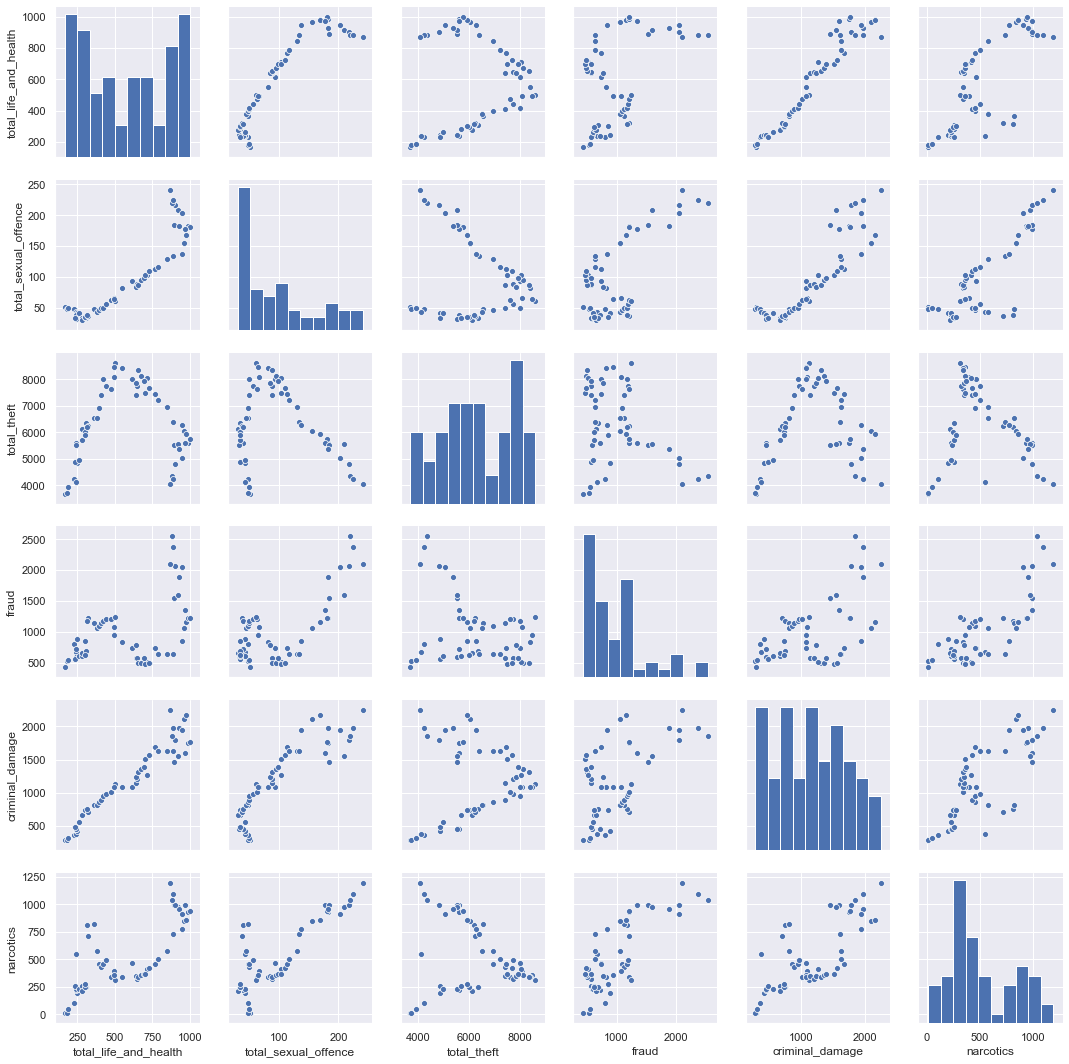

In [29]:
#We can create a pairgrid of our new df.
sns.pairplot(data=ch_crime)

#### We can see a strong linear correlation between total_life_and_health crimes with criminal_damage and with total_sexual_offences. Let's look at a correlation plot.

(6, 0)

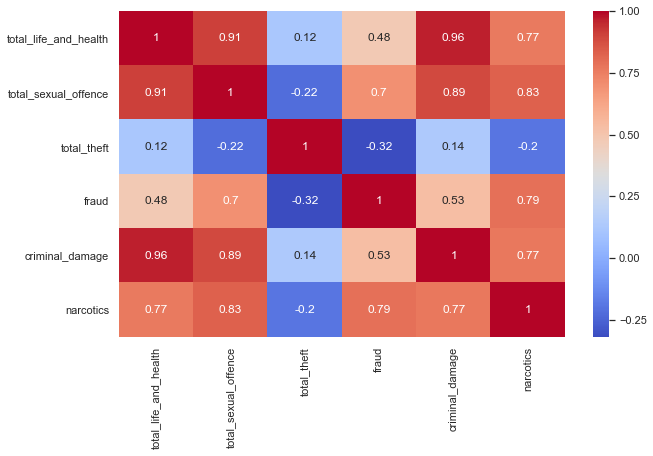

In [30]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1)
sns.heatmap(ch_crime.corr(),annot=True,cmap='coolwarm', annot_kws={'size':12})
plt.ylim(6, 0)
#also looks good with mako

#### Here we see quite a high correlation between total_life_and_health crimes and criminal_damage (0.96), and total_life_and_health with total_sexual_offence (0.91).

We can first interpret the relationship between total_life_and_health and total_sexual_offence. Using statistics from 2020 i.e. the raw data, gathered by Brå *Ref. 1*. 

total_life_and_health
* For *2020*, we note that for *Crimes against life and health* **Ch. 3**, the majority of crimes reported are *assault* at 92 %. 
* Within *assault* we see that *assault against women* is 35 % and *assault against men* is 35 % for *persons 18 years and older*. 

* In each category of *assault* of either men or women 18 years or older we have two different cases. Perpetrators assaulting women are mostly an *Intimate partner* 47% or someone known to the victim 34 %. Whereas for men, reported assault from a *Perpetrator unknown to the victim* is slightly more common at 55%. 

* *Assault against women 18 years or older* is **32 %** of the total crimes *life_and_health*, and similarly for men at **33 %**. Whereas, *Assault against girls* and *boys* (under 15) represent **8 %** and **12 %** of total_sexual_offences, respectively.



total_sexual_offences
* For *Sexual offences* **Ch. 6**, we see that *rape* 37% and *sexual molestation* 41% are the most reported cases. 

rape
* *Assault against women 18 years or older* is 51 % of *rape* and **19%** of total_sexual_offences. Furthermore, of those crimes reported as *assault against women 18 years or older*, 33 % are listed as an *Intimate partner*, and 38 % as *Other perpetrator known to the victim*. 

* *Assault against men 18 years or older* represents only 3% of *rape* and **1 %** of total_sexual_offences. 

* Whereas, rape *Against girls under 15 years* represents **10 %** of total_sexual_offences.

sexual molestation
* 50 % of cases under *Sexual molestation* are *against women 18 years or older*, the majority of which (67%) are a *Perpetrator unknown to the victim*. These cases make up a total of **20 %** of total_sexual_offences. 

* For crimes *Against men 18 years or older*, we have only **2 %** of total_sexual_offences.

* Whereas, *Sexual molestation* categorized as *Against girls under 15 years* represents **10 %** of total_sexual_offences.

* Whereas, *Sexual molestation* categorized as *Against boys under 15 years* represents **2 %** of total_sexual_offences.

The correlation between *total_life_and_health crimes* and *total_sexual_offence* covered under **Ch. 3** and **Ch. 6** respectively is thus made more clear. The majority of crimes in Ch. 3 are assault, particularly, assault against women 18 yrs and older, and within Ch. 6 they are rape and sexual molestation, particularly against women 18 yrs and older in both sections. As it is defined in the Penal Code *Ref. 2*, assault is the infliction of bodily harm on a person, and the act of rape is considered when a participation is a result of assault or other violence. Therefore, we might conclude that asssault cases covered in Ch. 3 and Ch. 6 may be reported both as assault and rape, but only in cases where women and girls are concerned.

criminal_damage
* For *Criminal damage* **Ch. 12** we note that *Graffiti* crimes are the highest, representing 48 % of Ch. 12. After this, crimes *Against the state, local authority, county council (not graffiti), *Other damage (not graffiti) and damage *on motor vehicles (not through fire)* follow with 50% of *Criminal damage*.

There is no clear correlation in terms of classification of crimes, which we can see between criminal_damage and total_life_and_health, we can only see that they both have an upwards trend from the beginning of our data set.

*References:* 
1. To see the full statistics on reported crimes for each section of the Swedish criminal code from 2008 - 2020: https://www.bra.se/bra-in-english/home/crime-and-statistics/crime-statistics.html#Reportedoffences Under Reported offences select -> download tables -> period -> year.

2. English translation of the Swedish Criminal Code. https://www.government.se/press-releases/2020/01/an-up-to-date-english-translation-of-the-swedish-criminal-code/

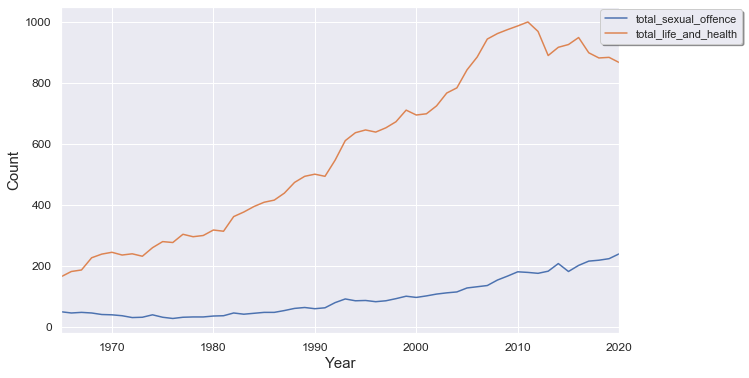

In [31]:
#Create a simple plot of the total_life_and_health and total_sexual_offences over the entire time period.
plt.figure(figsize=(10,6))
ax = sns.lineplot(x=crime.index, y='total_sexual_offence', data=crime, label='total_sexual_offence')
sns.lineplot(x=crime.index, y='total_life_and_health', data=crime, label='total_life_and_health')
#ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000] #alternative method for setting 'K' as place holder for larger numbers.
#ax.set_yticklabels(ylabels) #produce output for yticks in 'K'
ax.set_ylabel('Count', fontsize=15)
#ax.set(ylim=(-100,25000))

ax.set(xlim=(1965,2020))
ax.tick_params(labelsize=12)
ax.set_xlabel('Year', fontsize=15)

#plt.ylabel("Counts")
#plt.xlabel("Year")
plt.legend(loc = 'upper right', shadow = True, bbox_to_anchor = (1.23, 1.01))


Here we see that total life and health crimes are higher than total sexual offences reported, but they do follow a somewhat similar trend, until, that is, 2010, where total life and health crimes seems to begin to decrease. 

Total life and health vs criminal damage. Why such a high correlation?

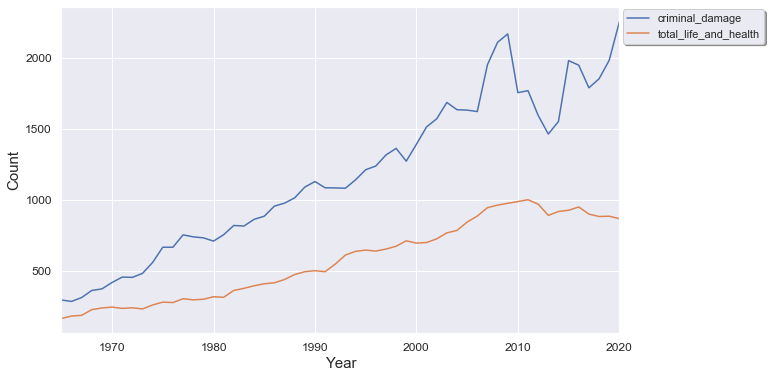

In [32]:
#Create a simple plot of the total_life_and_health and criminal_damage over the entire time period.
plt.figure(figsize=(10,6))
ax = sns.lineplot(x=crime.index, y='criminal_damage', data=crime, label='criminal_damage')
sns.lineplot(x=crime.index, y='total_life_and_health', data=crime, label='total_life_and_health')
#ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000] #alternative method for setting 'K' as place holder for larger numbers.
#ax.set_yticklabels(ylabels) #produce output for yticks in 'K'
ax.set_ylabel('Count', fontsize=15)
#ax.set(ylim=(-100,25000))

ax.set(xlim=(1965,2020))
ax.tick_params(labelsize=12)
ax.set_xlabel('Year', fontsize=15)

#plt.ylabel("Counts")
#plt.xlabel("Year")
plt.legend(loc = 'upper right', shadow = True, bbox_to_anchor = (1.27, 1.01))


Interestingly, we see a strong upwards trend for both, until late 2000's, when criminal_damage starts to fluctuate widely just before 2010, when total_life_and_health crimes start to slow and then decrease. Overall, the trends appear to be non-linear.


## Model Selection

In order to model the trends and attempt to accuratly predict the forthcoming years, we must first understand our data, how it can be prepared, computational efficiency, and the performance metrics used when applying either classical or machine learning techniques. 

In our understanding of whether or not an ML approach to time-series forcasting is appropriate, we should create a benchmark for perfomance as research suggests. 



> ...applications in the field of forecasting and a considerable amount of research has been conducted on how a special class of it, utilizing Machine Learning methods (ML) and especially Neural Networks (NNs), can be exploited to improve time series predictions. ...limited objective evidence is available regarding their relative performance as a standard forecasting tool . Their superiority claims are characterized by the following three major limitations:

> * Their conclusions are based on a few, or even a single time series, raising questions about the statistical significance of the results and their generalization.
> * The methods are evaluated for short-term forecasting horizons, often one-step-ahead, not considering medium and long-term ones.
> * No benchmarks are used to compare the accuracy of ML methods versus alternative ones.

Reference:  *Makridakis S, Spiliotis E, Assimakopoulos V (2018) Statistical and Machine Learning forecasting methods: Concerns and ways forward. PLoS ONE 13(3): e0194889. https://doi.org/10.1371/journal.pone.0194889*

See further:
https://machinelearningmastery.com/findings-comparing-classical-and-machine-learning-methods-for-time-series-forecasting/


## Total Crimes forecasting 

We can create a new data frame in order to simplify the models. We start with looking at the total crime over the entire time period. 

In [33]:
#Create a sub-df which looks at only total crimes. 
total_crime = crime.loc[:,['total_crimes']]
total_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 1965 to 2020
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   total_crimes  56 non-null     int64
dtypes: int64(1)
memory usage: 2.9 KB


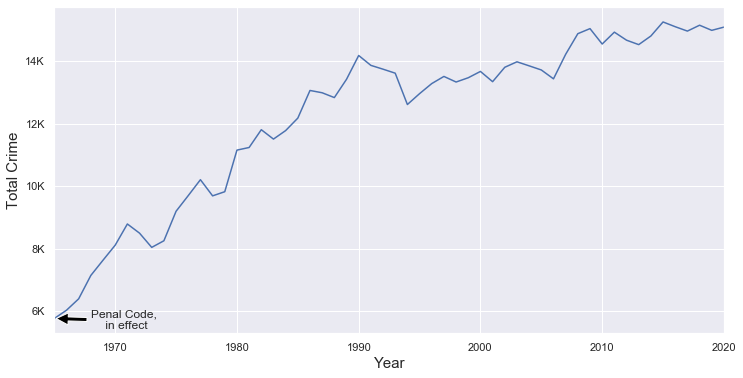

In [34]:
fig, ax = plt.subplots(figsize=(12,6))

#ax.set_title('Total Crime', fontsize=16)
ax = sns.lineplot(x=total_crime.index, y='total_crimes', data = total_crime, sort = False)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000] #alternative method for setting 'K' as place holder for larger numbers.
ax.set_yticklabels(ylabels) #produce output for yticks in 'K'
ax.set_ylabel('Total Crime', fontsize=15)
ax.set_xlim(1965,2020)
ax.set_xlabel('Year', fontsize=15)

# Add labels to the plot
#style = dict(size=10, color='black')
#ax.text(1965, 82000, "Penal Code in effect", ha='right', **style, fontsize=12)

#Alternatively, we can add a callout with an arrow, which is much nicer.
ax.annotate("Penal Code,\n in effect", xy=(1965, 5772),  xycoords='data',
            xytext=(70, -10), textcoords='offset points',size=12, ha='center',
            arrowprops=dict(facecolor='black', shrink=0.05)) #Note: arrowstyle and face color are not compatible in this plot.

#ax.annotate("GPS began", xy=(1990, 12000),  xycoords='data',
#            xytext=(50, -60), textcoords='offset points',size=12, ha='center',
#            arrowprops=dict(facecolor='black', shrink=0.05)) #Note: arrowstyle and face color are not compatible in this plot.

#ax.annotate("EU dir anti-theft in cars", xy=(1998, 12000),  xycoords='data',
#            xytext=(100, -60), textcoords='offset points',size=12, ha='center',
#            arrowprops=dict(facecolor='black', shrink=0.08)) #Note: arrowstyle and face color are not compatible in this plot.


plt.show()

#Check out more fun labeling tips here: https://jakevdp.github.io/PythonDataScienceHandbook/04.09-text-and-annotation.html
#https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html#matplotlib.axes.Axes.annotate


### Seasonal decomposition

We can look into our data to see if any seasonal components exist. We can also look at trends and fluctuations.

In using our decoposition method, we must set a period of observation for x. As we do not have a specific period in terms of months, I will choose years. As we know, the Penal Code has had many updates since its implementation, these updates can be every fourth year (ANDT) or sporadically when required.

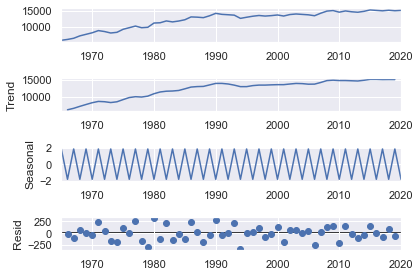

In [35]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(total_crime, period=2, model='additive')
fig = decomposition.plot()
plt.rcParams['figure.figsize']=[12,8]

In [42]:
total_crime_log = np.log(total_crime)
total_crime_log['total_crime_log'] = total_crime_log
total_crime_log.drop('total_crimes', axis=1, inplace=True)
total_crime_log.head()

,total_crime_log
year,
1965,8.660774
1966,8.705497
1967,8.764210
1968,8.874868
1969,8.940760


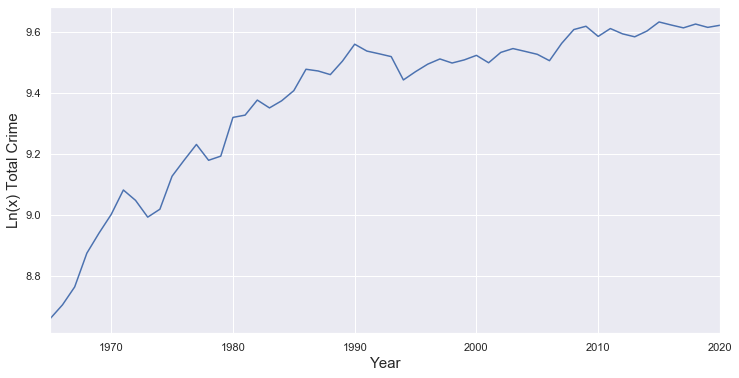

In [43]:
fig, ax = plt.subplots(figsize=(12,6))

#ax.set_title('Log Total Crime', fontsize=16)
ax = sns.lineplot(x=total_crime_log.index, y='total_crime_log', data = total_crime_log, sort = False)
#ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000] #alternative method for setting 'K' as place holder for larger numbers.
#ax.set_yticklabels(ylabels) #produce output for yticks in 'K'
ax.set_ylabel('Ln(x) Total Crime', fontsize=15)
ax.set_xlim(1965,2020)
ax.set_xlabel('Year', fontsize=15)

plt.show()


If we assume an additive decomposition, then we can write
                        $$ yt=St+Tt+Rt $$
where $ yt $ is the data, $ St $ is the seasonal component, $ Tt $ is the trend-cycle component, and $ Rt $ is the remainder component, all at period $ t. $ Alternatively, a multiplicative decomposition would be written as
                        $$ yt=St×Tt×Rt. $$ 

The additive decomposition is the most appropriate if the magnitude of the seasonal fluctuations, or the variation around the trend-cycle, does not vary with the level of the time series. When the variation in the seasonal pattern, or the variation around the trend-cycle, appears to be proportional to the level of the time series, then a multiplicative decomposition is more appropriate. Multiplicative decompositions are common with economic time series.

An alternative to using a multiplicative decomposition is to first transform the data until the variation in the series appears to be stable over time, then use an additive decomposition. When a log transformation has been used, this is equivalent to using a multiplicative decomposition because
            $$ yt=St×Tt×Rt $$ is equivalent to $$ logyt=logSt+logTt+logRt. $$
            
Reference: https://otexts.com/fpp2/components.html

### Transformation of non-linear data

The simplest way of modelling a nonlinear relationship is to transform the forecast variable y and/or the predictor variable x before estimating a regression model. While this provides a non-linear functional form, the model is still linear in the parameters. The most commonly used transformation is the (natural) logarithm.
Reference: https://otexts.com/fpp2/nonlinear-regression.html


In order to select the correct type of model we must look into the type of data that we have. 
See this helpful reference: https://otexts.com/fpp2/tspatterns.html

From the our data, it looks like we have a nonlinear trend. Thus it could be wise to first start with such a regression method for forecasting. 

Instead of higher order terms, e.g. quadradic functions, $$x_1,t = t^1, x_2,t = t^2 ...$$ 

We can use a piece-wise linear function which can 'bend' or change direction over time:

$$ x_1,t = t $$
$$ x_2,t = (t-\tau)_+ = \left\{ 
                            \begin{array}\\ 
                                0 & t <\tau \\
                                (t-\tau) & t ≥ \tau \\
                            \end{array}
                        \right.$$


Reference: https://otexts.com/fpp2/nonlinear-regression.html



We must decide where we will split the data in order to perform our train test split. For the above data we have a time series that spans over decades, therefore our splitting should be over a portion of these years, typically 20-30%. 

* We can point to certain dramatic shifts in the data trend, based on the modernization of the Penal Code, monitoring and reporting.  

Because, I do not know details on how the police have changed their reporting (need to do more research and possible interviews) I can instead focus on leagal changes and historical information.

* The Penal Code came in to effect, namely from 1965. From there I can look at major changes in the Penal Code and how this might have affected the trends in crime, e.g. when the blood alcohol content minimum threshold was changed for DUI, when using narcotics became illegal to use and posses and when police forces were increased, or when the definition of rape was reclassified. 

If I want to focus on a particular aspect of crime, then I can start to break up the timeline e.g. to model after modern surveilence was implemented in and around homes, private shops, municipal buildings, and other businesses or when cars were required to have certain security features like alarms or tracking devices. 

* For example, while the technology of CCTV has been around for some time, the major breakthrough in surveillance was during the 1990s when digital multiplexing was developed, allowing the recording of several cameras at once, including time-lapse and motion detection.


* This lead to a change from a largely upwards trend to a downwards trend in burglaries, and may have affected other crimes such as those listed as criminal_damage.
Source: https://en.wikipedia.org/wiki/Closed-circuit_television

Thus we can see that it is most benefitial to understand key historical changes which may affect the data and which could give information about why changes in trends take place.

## Train Test Split


In [106]:
len(total_crime_log)

56

We can perform train test split around 1997 which is about 33% of the data that we have in after the introduction of the Penal Code.

We will separate the data manually by selecting the last 23 years off of the data frame as our test data.

By segmenting the data we avoid data leakage, which affects our model performance on new data. We do not want to train on test data!

Reference:https://machinelearningmastery.com/data-leakage-machine-learning/

In [107]:
test_size=17 #set up test size about 30% of the total data.
test_ind = len(total_crime_log)-test_size #set up interval between test/train data

In [108]:
train = total_crime_log.iloc[:test_ind] #training data will be dates before 2004
test = total_crime_log.iloc[test_ind:] #test data will be dates after 2004, i.e. from the test interval to the end.


In [109]:
#train
len(train)

39

In [110]:
#test
len(test)

17

## Imports and scaling
We need to import the packages if we have not already done so above. We then define our scaler.

In [111]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [112]:
#Introduce  MinMaxScaler in order to scale the data.
scaler = MinMaxScaler()
#fit the scaler to the training dataset only.
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [113]:
#We now transform both test and training data with scaler separately.
#We want to have scaled train for our model training and scaled test for 
#our validation data.
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

#### Time Series Generator

This class takes in a sequence of data-points gathered at equal intervals, along with time series parameters such as stride, length of history, etc., to produce batches for training/validation.

We need to define the length of our generator such that it is less than the test size, in order to predict one year out. We can feed a smaller batch and get out a batch of equal length. 

We can choose 13 years for the length.

In [114]:
length = 13 
generator = TimeseriesGenerator(scaled_train, scaled_train, 
                                length = length)

In [115]:
X,y = generator[0]

len(X[0])

13

In [116]:
#X

In [117]:
#y

## Creating the model

We are only using one feature in our time series. 

We start with long short-term memory model with 100 neurons. We select the rectified linear activation function 'relu'.

> a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.

https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/

We add in one Dense layer because our data set is relatively small. 

Finally, we compile the model using 'adam' optimizer and mean square error as the loss estimator becuase we have a continuous function.

Afterwards, we can get a model summary, which tells us the number of trainable parameters and the output shape of our neural network.

In [118]:
n_feature = 1

model = Sequential()

model.add(LSTM(100, activation='sigmoid',input_shape=(length, n_feature)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse') #mse because we have a continuous variable

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


## Monitoring

Next, we set up our early stopping, and monitor our model for overfitting by looking at the vaildation data, i.e. the test data. We set a patience of 5, which controls the limit for how long the model will look for a stable minimum before stopping, this is done to avoid overfitting.

Reference: https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

ModelCheckpoint
It could be beneficial to know at which point the model reaches a loss minimum according to some baseline that you are interested in. In that case, one should include the model checkpoint callback in order to identify and save the best model observed during training.

In [119]:
my_callbacks = [EarlyStopping(monitor='val_loss', patience=5),
                ModelCheckpoint("checkpoint.h5", save_best_only=True)]

Next we set up our validation generator. This uses so called validation data (data from our test set) which will be included when fitting the training data. It is not used in training the model, but as a validation in the performance of the model after each epoch.
Reference: see above

In [120]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test,
                                          length = length)

## Fitting the Model

Finally, we can fit our model with our training data. We add in early stopping and validation data check. We start with 30 epochs, but probably only need a few as the data is quite small.

#### Reference https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

In [121]:
model.fit_generator(generator,epochs=40,
                   validation_data = validation_generator,
                   callbacks=my_callbacks)

Epoch 1/40
1/1 [==============================] - 0s 216ms/step - loss: 0.4450 - val_loss: 0.4340
Epoch 2/40
1/1 [==============================] - 0s 183ms/step - loss: 0.2331 - val_loss: 0.2234
Epoch 3/40
1/1 [==============================] - 0s 179ms/step - loss: 0.0932 - val_loss: 0.0867
Epoch 4/40
1/1 [==============================] - 0s 191ms/step - loss: 0.0236 - val_loss: 0.0177
Epoch 5/40
1/1 [==============================] - 0s 205ms/step - loss: 0.0147 - val_loss: 3.9067e-05
Epoch 6/40
1/1 [==============================] - 0s 161ms/step - loss: 0.0452 - val_loss: 0.0070
Epoch 7/40
1/1 [==============================] - 0s 160ms/step - loss: 0.0838 - val_loss: 0.0150
Epoch 8/40
1/1 [==============================] - 0s 163ms/step - loss: 0.1058 - val_loss: 0.0146
Epoch 9/40
1/1 [==============================] - 0s 161ms/step - loss: 0.1048 - val_loss: 0.0080
Epoch 10/40
1/1 [==============================] - 0s 171ms/step - loss: 0.0869 - val_loss: 0.0015


## Loss evaluation 

We can now look at how our loss compares to the validation data. 
We expect that loss should decrease with validation data loss, and we would like to find the point at which validation loss starts to increase, so we have a stopping point in number of epochs we need before over fitting.

In [122]:
losses = pd.DataFrame(model.history.history)

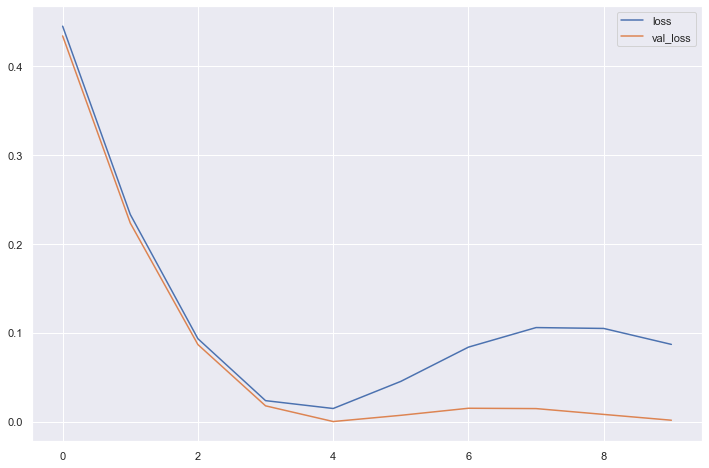

In [123]:
losses.plot()

Here we can see that the traing losses start to minimize around 5 epochs, however, and then starts to increase again.

## Predicting and forecasting 

When initializing model, we see that loss drops quickly after 1 epoch and seems stable after 6 epochs in the first run, i.e. there is no improvement after this point. 

In terms of model performance we see that the model follows the trend of the data. 

Essentially the network is learning off of the trends that it sees, it doesn't have information about changes in laws, technology etc. but still is able to show that the total crimes is increasing over time.

Now we want to do retraining and rescaling on the full data from 1950 to 2020 in order to produce our forecasted data and then combine them together.


### Predictions

We use a for loop we create a list of predictions from the data for a period that is just under what we selected for our training data. If we select too long of a period we will generate more noise.

In [124]:
test_predictions = [] #empty list

eval_batch = scaled_train[-length:]  #grab 1ast eval batch points from scaled_train set. Recall that is length of batches is 5 y So grab last 5 points of training set to predict 1 year into the future, and that is the first point in the test set (eval_batch_one).
current_batch = eval_batch.reshape((1,length,n_feature)) #reshape batch for model b/c we are passing in 1 item per batch. and set to length and 1 y feature for current batch 

for i in range(len(test)): # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]  #do first prediction. based off of current batch, index first item to be current prediction
    # store the prediction
    test_predictions.append(current_pred) #starts as empty list, and add current prediction to it.
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1) #move current batch forward one time step. update with the current prediction. and toss out first item in list
   

In [125]:
#rescaling the prediction data so they match the original data. 
true_predictions = scaler.inverse_transform(test_predictions)

test['Predictions'] = true_predictions

test

,total_crime_log,Predictions
year,,
2004,9.536546,9.651484
2005,9.526974,9.654506
2006,9.506065,9.654809
2007,9.562827,9.654916
2008,9.608176,9.654979
2009,9.619000,9.655028
2010,9.585690,9.655067
2011,9.611463,9.655097
2012,9.594105,9.655119


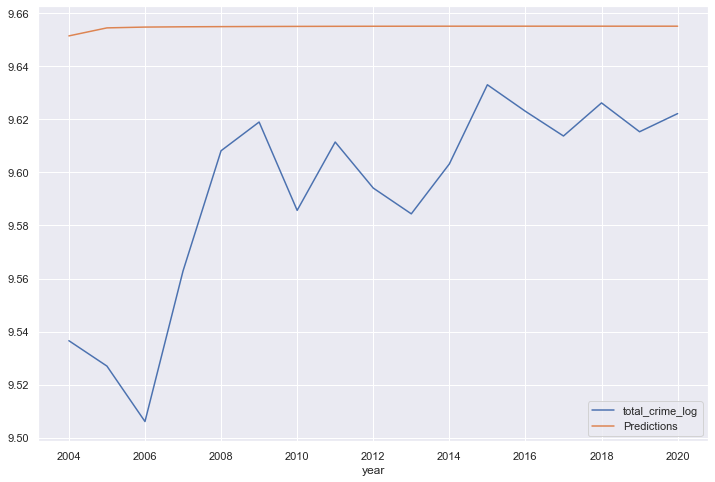

In [126]:
test.plot(figsize=(12,8))

#we see a trend which follows our data, sort of.

## Performance evaluation

Next we can look at the root mean squared error (RMSE) as way to judge our model performance.

Reference:

Let us first join the forecast predictions to our total_crime data frame.

In [127]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 2004 to 2020
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   total_crime_log  17 non-null     float64
 1   Predictions      17 non-null     float64
dtypes: float64(2)
memory usage: 408.0 bytes


In [128]:
#test = test.drop('Forecast')
#test

In [129]:
#total_crime_inv = np.exp(total_crime_log)
#total_crime_inv['total_crime_inv'] = total_crime_inv
#total_crime_inv.drop('total_crime_log', axis=1, inplace=True)
#total_crime_inv.head()

test_inv = np.exp(test)test_inv

,total_crime_log,Predictions
year,,
2004,13857.0,15544.833723
2005,13725.0,15591.887006
2006,13441.0,15596.616883
2007,14226.0,15598.282462
2008,14886.0,15599.262494
2009,15048.0,15600.026828
2010,14555.0,15600.635646
2011,14935.0,15601.110675
2012,14678.0,15601.441865


In [134]:

test_inv.drop('total_crime_log', axis=1, inplace=True)
test_inv.head()

,Predictions,total_crimes
year,,
2004,15544.833723,13857.0
2005,15591.887006,13725.0
2006,15596.616883,13441.0
2007,15598.282462,14226.0
2008,15599.262494,14886.0


In [135]:
from sklearn.metrics import mean_squared_error

In [147]:
mean_squared_error(test_inv['total_crimes'],test_inv['Predictions'])

1141801.9304173111

In [148]:
#RMSE
RMSE_test_inv = np.sqrt(mean_squared_error(test_inv['total_crimes'],test_inv['Predictions']))
RMSE_test_inv

1068.5513232490573

In [149]:
test_inv['total_crimes'].min()


13440.999999999989

In [150]:
test_inv['total_crimes'].max()


15261.000000000007

In [151]:
mean_test_inv = test_inv['total_crimes'].mean()
mean_test_inv

14663.764705882351

In [153]:
RMSE_test_inv/mean_test_inv

0.07287019020568498

The RMSE is about 7% of the mean, which is not great.

/Applications/anaconda3/envs/mytfenvnew/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/Applications/anaconda3/envs/mytfenvnew/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/Applications/anaconda3/envs/mytfenvnew/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



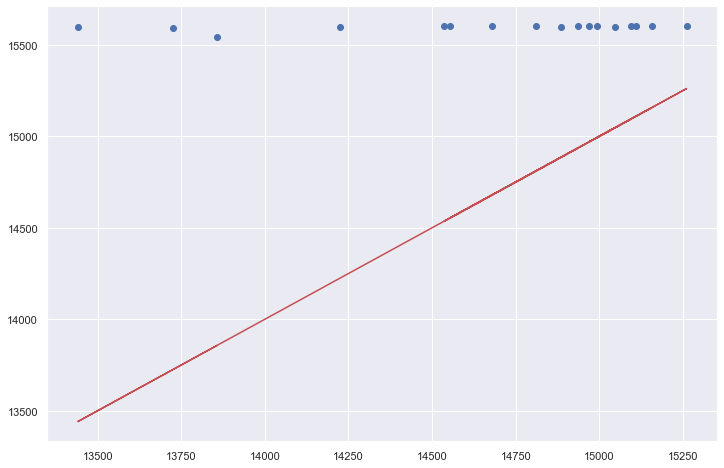

In [154]:
#Predictions
plt.scatter(test_inv['total_crimes'], test_inv['Predictions'])

#Perfect predictions
plt.plot(test_inv['total_crimes'], test_inv['total_crimes'], 'r')

In [155]:
errors = test_inv['total_crimes'].values - test_inv['Predictions']

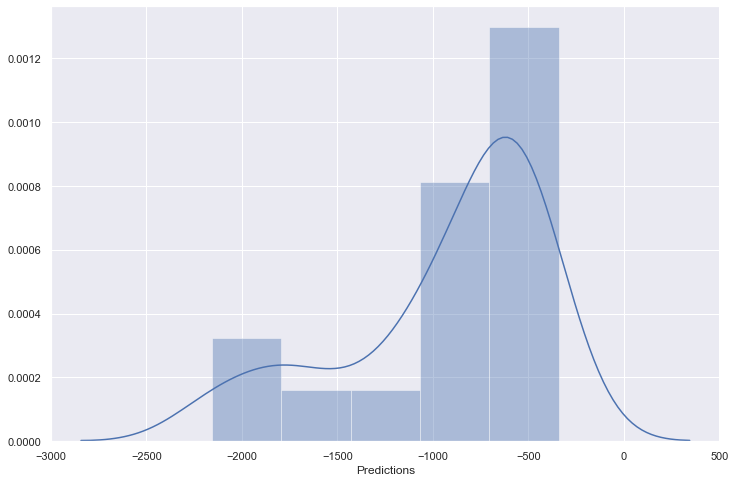

In [156]:
sns.distplot(errors)

## Retrain and forecasting

In [157]:
#Now using the full data set of total crime for the time range form 1952-2020.
#Remember that we excluded the data from before the Penal Code was enacted.
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(total_crime_log)
len(scaled_full_data)

56

In [158]:
scaled_full_data.shape

(56, 1)

In [162]:
length = 13
generator = TimeseriesGenerator(scaled_full_data, 
                                scaled_full_data, length = length)
my_callback_forecast = [ModelCheckpoint("checkpoint_forecasting.h5", save_best_only=True)]

We can use the same number of epochs until we saw our valication_loss start to increase in order to avoid overfitting our data, approximately 4. 

We do not include earlystopping and validation data as previously because that would be cheating.

In [164]:
model = Sequential()

model.add(LSTM(100, activation = 'sigmoid', input_shape=(length, n_feature)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit_generator(generator, epochs=6, callbacks=my_callback_forecast)


Epoch 1/6
1/1 [==============================] - 0s 86ms/step - loss: 0.5827
Epoch 2/6
1/1 [==============================] - 0s 93ms/step - loss: 0.3301
Epoch 3/6
1/1 [==============================] - 0s 122ms/step - loss: 0.1522
Epoch 4/6
1/1 [==============================] - 0s 93ms/step - loss: 0.0485
Epoch 5/6
1/1 [==============================] - 0s 93ms/step - loss: 0.0131
Epoch 6/6
1/1 [==============================] - 0s 119ms/step - loss: 0.0306


In [165]:
forecast = [] #create an empty list

period = 4 #predictions for next 4 years

#grab 1ast eval batch points from scaled_training set. 
#Recall that is length of batches is 4 years. So grab last 4 points of 
#training set to predict 1 year into the future, and that is the first
#point in the test set (first_eval_batch). 
eval_batch = scaled_full_data[-length:]

#reshape batch for model b/c we are passing in 1 item per batch. 
#and set to length and 1 y feature for current batch 
current_batch = eval_batch.reshape((1,length,n_feature))

for i in range(period):
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]  #do first prediction. based off of current batch, index first item to be current prediction
    # store the prediction
    forecast.append(current_pred) #starts as empty list, and add current prediction to it.
     # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1) #move current batch forward one time step. update with the current prediction, and toss out first item in list
    

In [166]:
forecast = scaler.inverse_transform(forecast)

Now we need to create a new timestamp index to include our scaled forecast data into a new data frame which we call forecast_df. 

We do this by adding in date information to our forecast data, periods should have a yearly start 'YS' and run for a period of that which we defined in our forecast above, i.e. 4 years.

In [167]:
forecast_index = pd.date_range(start='2021', periods=period, freq='Y')

In [168]:
forecast_df = pd.DataFrame(data=forecast, index=forecast_index, columns=['Forecast'])


In [169]:
forecast_df

,Forecast
2021-12-31,9.662124
2022-12-31,9.662242
2023-12-31,9.662112
2024-12-31,9.661856


In [170]:
#Convert date data to match our df.
forecast_df_index = pd.DatetimeIndex(forecast_index).year

forecast_df = pd.DataFrame(data=forecast, index=forecast_df_index, columns=['Forecast'])

forecast_df

,Forecast
2021,9.662124
2022,9.662242
2023,9.662112
2024,9.661856


In [174]:
forecast_df = np.exp(forecast_df)
forecast_df

,Forecast
2021,15711.121231
2022,15712.979295
2023,15710.924151
2024,15706.908973


In [175]:
forecast_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 2021 to 2024
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Forecast  4 non-null      float64
dtypes: float64(1)
memory usage: 64.0 bytes


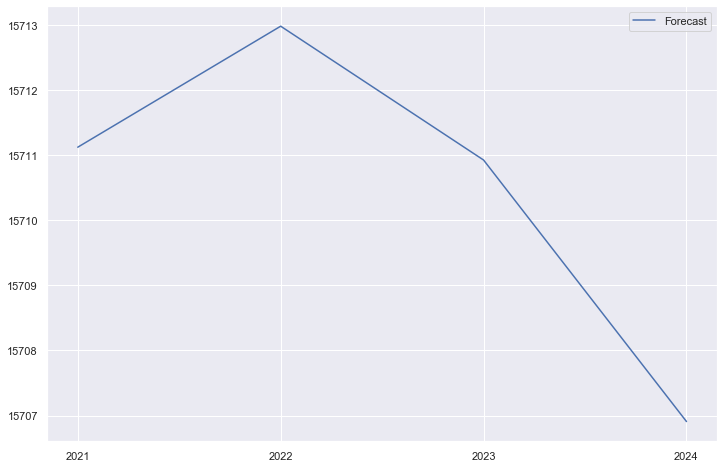

In [176]:
forecast_df.plot(xticks=forecast_df_index)

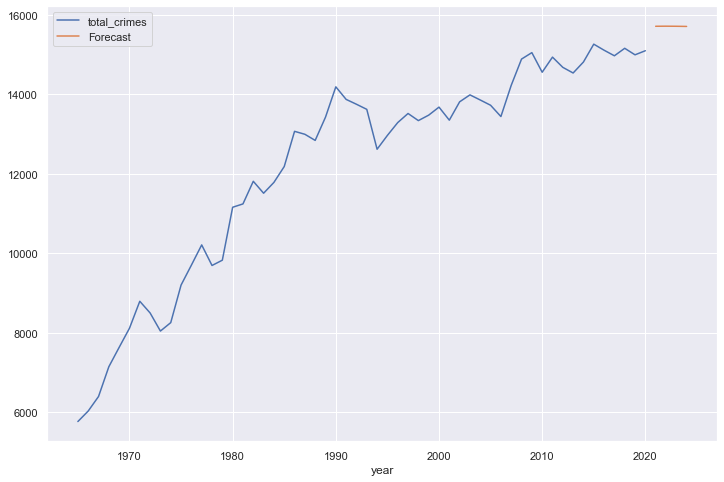

In [177]:
#Joing forecast with our original plot.
ax = total_crime.plot()
forecast_df.plot(ax=ax)

The forecasting not so good in this case, as we can see a prediction which does not seem to follow our curve. We have a prediction which is quite higher than our curve.

## Compare with ARIMA or Theta for multi-step forecasting on univariate datasets.

Do the simpler linear methods e.g. exponential smoothing outperform complex models like decision trees, multilayer perceptrons (MLP), and long short-term memory (LSTM)
https://machinelearningmastery.com/findings-comparing-classical-and-machine-learning-methods-for-time-series-forecasting/

## Notes: to be addressed before finishing. 

An interesting aspect of crime prevention as described by Brå: https://www.bra.se/forebygga-brott/samverkan/egna-forberedelser/identifiera-monster.html

Look into the simplest models in linreg using Python or Matlab are there any which are surprisingly better at predicting trends? Aim to use data 5-10 years before 2020.

#### Interpretation of crime and the statistics

In order to appropriately interpret the crime statistics one must be able to understand a number of things first. For example, 1) how is a crime reported (single act for multiple instances of one person or one for each act, group crime etc.) 2) When is crime reported, i.e. what are the statutes of limitations for crimes, if they occur in the same year as when they were reported or not. 3) Historical trends, can they influence how often crimes are reported, e.g. #MeToo. 4) Reporting, arrests and convictions, i.e. what percentage of the reported crimes are the crimes reported leading to arrests or convictions? 5) Faith in the justice system, i.e. is there a propendency for certain groups to report crimes more or less to the police based on their level in trust in whether or not the police will take action or are affective in pursuing and solving the crime?

https://bra.se/statistik/kriminalstatistik/tolka-statistiken.html
